# 1. Introduction

`agentools` is a lightweight and flexible library designed for building smart agent assistants across various industries. Whether you're creating an AI-powered customer service bot, a data analysis assistant, or a domain-specific automation agent, agentools provides a simple yet powerful foundation.

With its modular tool system, you can easily extend your agent's capabilities by integrating a wide range of tools. Each tool is self-contained, well-documented, and can be registered dynamically—making it effortless to scale and adapt your agent to new tasks or environments.

![](https://imgur.com/s8SlWbR.png)

To install and use this library please following:

```
git clone https://github.com/agentools
poetry install
```

# 2. Set up Agent

`agentools` is a flexible library for creating intelligent agents. You can configure your agent with tools, each encapsulated in a Python module under `agentools.tools`. This provides a workspace of tools that agents can use to interact with and operate in the realistic world. Each tool is a Python file with full documentation and it can be independently ran. For example, the `agentools.tools.websearch_tools` module contains code for interacting with a search API.

```
import os
from dotenv import load_dotenv
from tavily import TavilyClient
from dataclasses import dataclass
from typing import Union, Any
_ = load_dotenv()

@dataclass
class WebSearchClient():
    # connect
    tavily_client = TavilyClient(api_key=os.environ.get("TAVILY_API_KEY"))
    # run search

    def call_api(self, query: Union[str, dict[str, str]]):
        if isinstance(query, dict):
            query_string = "\n".join([f"{k}: {v}" for (k, v) in query.items()])
        else:
            query_string = query
        result = self.tavily_client.search(query_string,
                               include_answer=True)
        # print the answer
        return result["answer"]

def search_api(query: Union[str, dict[str, str]]) -> Any:
    """
    Search for an answer from a query string
    Args:
        query (dict[str, str]):  The input query to search
    Returns:
        The answer from search query
    """
    client = WebSearchClient()
    answer = client.call_api(query)
    return answer
```


In [ ]:
import os
import sys
from langchain_together import ChatTogether 
sys.path.append(os.path.join(os.getcwd(), "agentools"))
from agentools.agent.agent import Agent
from dotenv import load_dotenv
load_dotenv()

llm = ChatTogether(
    model="meta-llama/Llama-3.3-70B-Instruct-Turbo-Free"
)

# Step 1: Create Agent with tools
agent = Agent(
    llm = llm,
    tools = ['agentools.tools.yfinance_tools', 'agentools.tools.websearch_tools']
)

# Step 2: invoke the agent
df = agent.invoke("What is the price of Tesla stock in 2024?")
df.head()

INFO:httpx:HTTP Request: POST https://api.together.xyz/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Registered fetch_stock_data:
{'tool_name': 'fetch_stock_data', 'arguments': {'symbol': 'str', 'start_date': 'str', 'end_date': 'str', 'interval': 'str'}, 'return': 'pd.DataFrame', 'docstring': 'Fetch historical stock data from Yahoo Finance.', 'dependencies': ['yfinance', 'pandas'], 'module_path': 'agentools.tools.yfinance_tools'}
INFO:root:Registered visualize_stock_data:
{'tool_name': 'visualize_stock_data', 'arguments': {'symbol': 'str', 'start_date': 'str', 'end_date': 'str', 'interval': 'str'}, 'return': 'None', 'docstring': 'Visualize stock data with multiple chart types.', 'dependencies': ['yfinance', 'pandas', 'matplotlib', 'plotly'], 'module_path': 'agentools.tools.yfinance_tools'}
INFO:root:Registered plot_returns:
{'tool_name': 'plot_returns', 'arguments': {'symbol': 'str', 'start_date': 'str', 'end_date': 'str', 'interval': 'str'}, 'return': 'None', 'docstring': 'Visualize

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-02 00:00:00-05:00,250.080002,251.250000,244.410004,248.419998,104654200,0.0,0.0
2024-01-03 00:00:00-05:00,244.979996,245.679993,236.320007,238.449997,121082600,0.0,0.0
2024-01-04 00:00:00-05:00,239.250000,242.699997,237.729996,237.929993,102629300,0.0,0.0
2024-01-05 00:00:00-05:00,236.860001,240.119995,234.899994,237.490005,92379400,0.0,0.0
2024-01-08 00:00:00-05:00,236.139999,241.250000,235.300003,240.449997,85166600,0.0,0.0


INFO:httpx:HTTP Request: POST https://api.together.xyz/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 5.000000 seconds
INFO:httpx:HTTP Request: POST https://api.together.xyz/v1/chat/completions "HTTP/1.1 200 OK"


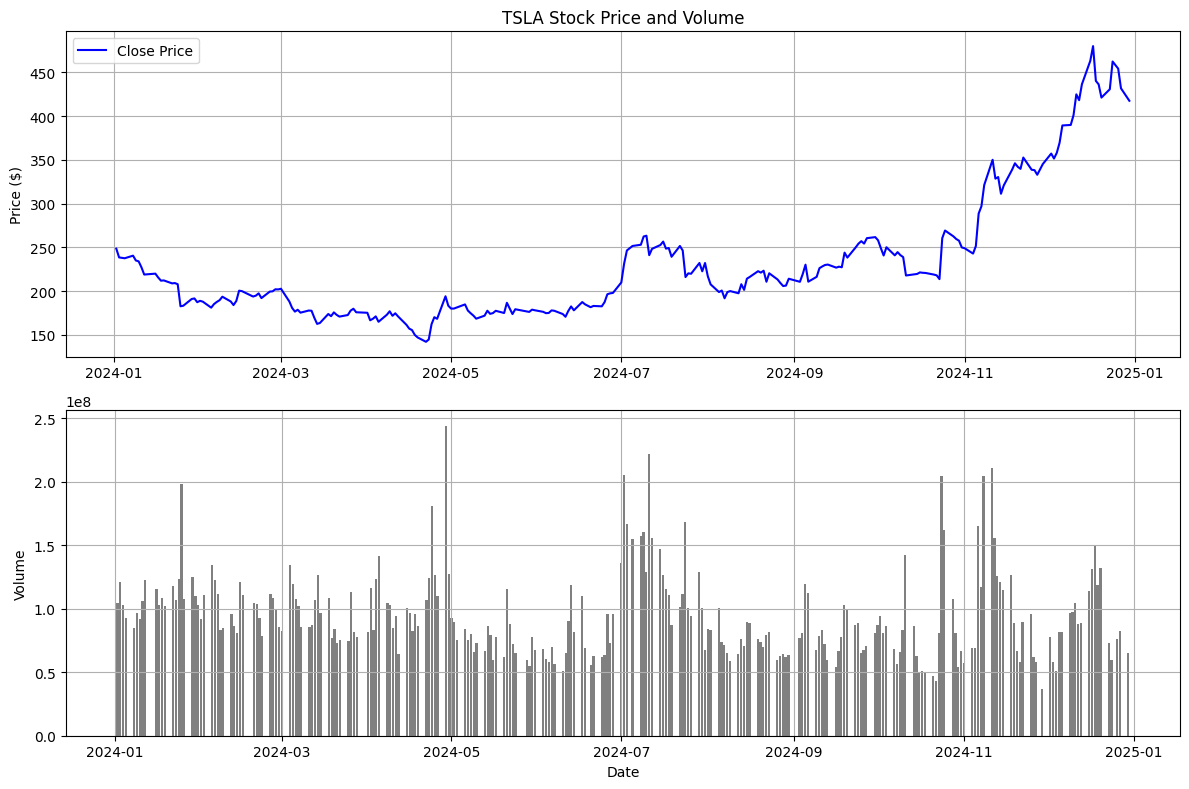

In [2]:
plot = agent.invoke("Let's visualize Tesla stock in 2024?")

In [3]:
plot = agent.invoke("Let's visualize the return of Tesla stock in 2024?")

INFO:httpx:HTTP Request: POST https://api.together.xyz/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 7.000000 seconds
INFO:httpx:HTTP Request: POST https://api.together.xyz/v1/chat/completions "HTTP/1.1 200 OK"


# 3. Register function tool

Function tools are registered directly in your runtime code by decorating them with the @function_tool without saving them into python module files.

In [6]:
import json
import os
from functools import wraps
from typing import Dict, Any
import inspect
from pathlib import Path
from agentools.register.tool import function_tool
from typing import List

@function_tool
def sum_of_series(x: List[float]):
    return f"Sum of list is {sum(x)}"

INFO:root:Registered tool: sum_of_series (runtime)


In [7]:
agent.invoke("Sum of this list: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]?")

INFO:httpx:HTTP Request: POST https://api.together.xyz/v1/chat/completions "HTTP/1.1 200 OK"


'Sum of list is 55'